In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> 向量空间 </font>

向量空间，顾名思义，是向量的空间，它定义了两种操作，即**加法**和**标量乘法**，遵循以下 $10$ 条公理。

1. ${u}+{v}$ 的和，记作 ${u}+{v}$，在 $V$ 中。
2. ${u}+{v}={v}+{u}$
3. $({u}+{v})+{w}={u}+({v}+{w})$
4. 在 $V$ 中存在一个零向量 $0$，使得 ${u}+{0}={u}$
5. 对于 $V$ 中的每个 ${u}$，存在一个向量 $-{u}$，使得 ${u}+(-{u})={0}$
6. 向量 ${u}$ 的标量倍 $c {u}$ 在 $V$ 中
7. $c({u}+{v})=c {u}+c {v}$
8. $(c+d) {u}=c {u}+d {u}$
9. $c(d {u})=(c d) {u}$
10. $1 {u}={u}$

虽然这 $10$ 条公理看起来显而易见且多余，但只需记住这一点：_向量空间中的加法和乘法是封闭的_。

所有的公理都不需要证明，并且都是不言自明的，我们可以使用一个用户定义的函数来可视化公理 $7$。

<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
C:\Users\cyy\AppData\Local\Temp\ipykernel_14148\838143989.py:69: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title('Axiom 7: $c(\mathbf{u}+\mathbf{v})=c \mathbf{u}+c \mathbf{v}$', size = 19, color = 'red')


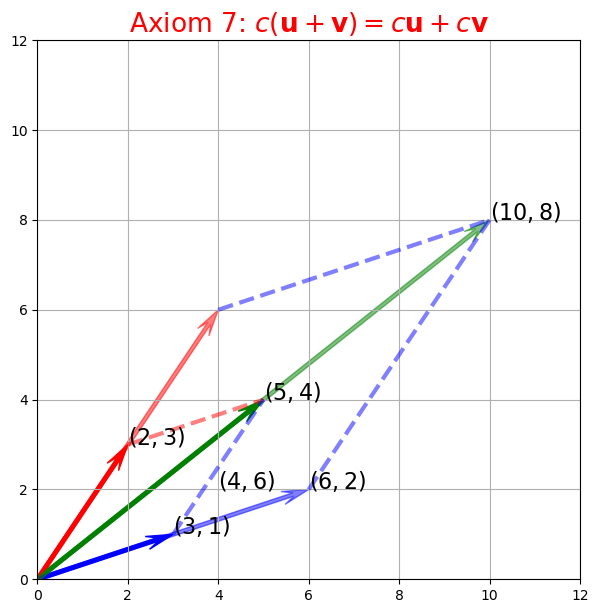

In [2]:
def vecSpaceAx7(u, v, c):
    fig, ax = plt.subplots(figsize = (7, 7))
    '''Syntax vecSpaceAx7(u, v, c), to demonstrate Axiom 7.'''
    ax.arrow(0, 0, u[0], u[1], color = 'red', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, v[0], v[1], color = 'blue', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, u[0]+v[0], u[1]+v[1], color = 'green', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, c*u[0], c*u[1], color = 'red', width = .08, alpha=.5, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, c*v[0], c*v[1], color = 'blue', width = .08, alpha=.5, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)    
    ax.arrow(0, 0, c*(u[0]+v[0]), c*(u[1]+v[1]), color = 'green', width = .08, alpha=.5,  
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ###########################Dashed Lines#################################
    point1 = [u[0], u[1]]
    point2 = [u[0] + v[0], u[1] + v[1]]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'red', alpha = .5)
    
    point1 = [v[0], v[1]]
    point2 = [u[0] + v[0], u[1] + v[1]]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)

    point1 = [c*v[0], c*v[1]]
    point2 = [c*(u[0] + v[0]),c*(u[1] + v[1])]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)

    point1 = [c*u[0], c*u[1]]
    point2 = [c*(u[0] + v[0]), c*(u[1] + v[1])]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)
    
    ####################################Text###############################
    
    ax.text(x = u[0], y = u[1], s = '$(%.0d, %.0d)$' % (u[0], u[1]), size = 16)
    ax.text(x = v[0], y = v[1], s = '$(%.0d, %.0d)$' % (v[0], v[1]), size = 16)
    ax.text(x = u[0]+v[0], y = u[1]+v[1], s = '$(%.0d, %.0d)$' % (u[0]+v[0], u[1]+v[1]), size = 16)    
    ax.text(x = c*u[0], y = c*v[1], s = '$(%.0d, %.0d)$' % (c*u[0], c*u[1]), size = 16) 
    ax.text(x = c*v[0], y = c*v[1], s = '$(%.0d, %.0d)$' % (c*v[0], c*v[1]), size = 16)     
    ax.text(x = c*(u[0]+v[0]), y = c*(u[1]+v[1]), s = '$(%.0d, %.0d)$' % (c*(u[0]+v[0]), c*(u[1]+v[1])), size = 16)     
    
    ax.set_title('Axiom 7: $c(\mathbf{u}+\mathbf{v})=c \mathbf{u}+c \mathbf{v}$', size = 19, color = 'red')
    
    ax.axis([0, np.max(c*u)+6, 0, np.max(c*v)+6])
    ax.grid(True)
    
if __name__ == '__main__':
    u = np.array([2,3])
    v = np.array([3,1])
    c = 2
    vecSpaceAx7(u, v, c)

尝试使用不同的向量。

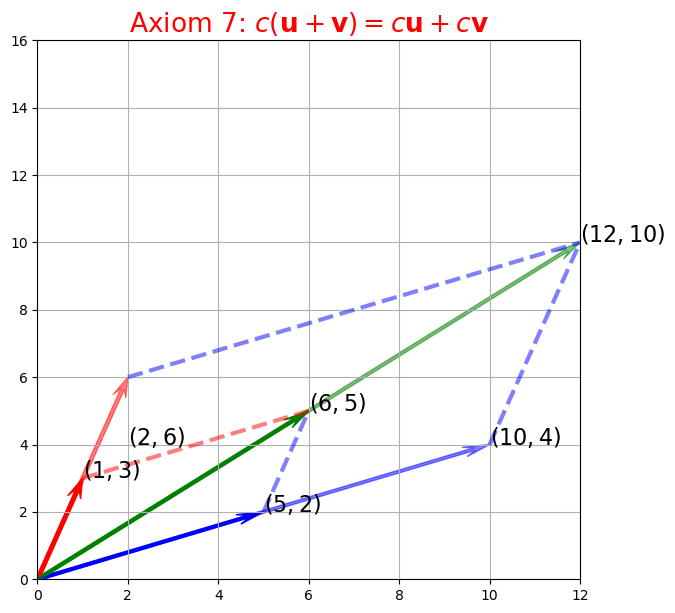

In [3]:
u = np.array([1, 3])
v = np.array([5, 2])
vecSpaceAx7(u, v, 2)

然而，向量空间的含义比包含向量更加普遍，函数和多项式也可以作为向量空间中的元素，就像我们在线性相关性部分所展示的那样。

不同之处在于函数具有无限数量的元素（连续函数），而不同于向量。

我们可以通过绘制两个三角函数 $\sin(x)$ 和 $\cos{(x+1)}$（线条图），它们在函数空间中的加法是粉色阴影的图形来演示向量空间中的函数。

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\cyy\AppData\Local\Temp\ipykernel_14148\3244165786.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.stem(x1, y1,  linefmt = 'red', label ='$\sin{x}$')
C:\Users\cyy\AppData\Local\Temp\ipykernel_14148\3244165786.py:15: SyntaxWarning: invalid escape sequence '\s'
  str1 = '$\sin(x)+\cos(x+1)$'


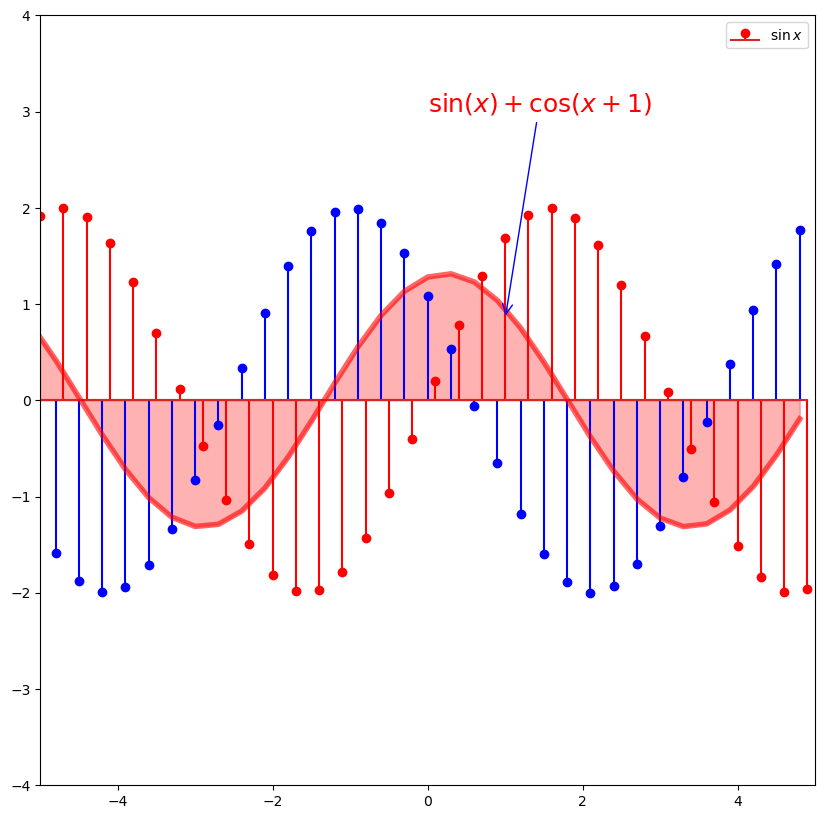

In [8]:
def funcVecSp(x1, x2, c):
    fig, ax = plt.subplots(figsize = (10, 10))
    '''Syntax funcVecSp(x), x is the domain, for instance, x = np.linspace(-3, 3, 20)'''
    y1 = c * np.sin(x1)
    ax.stem(x1, y1,  linefmt = 'red', label ='$\sin{x}$')
    
    y2 = c * np.cos(x2+1)
    ax.stem(x2, y2,  linefmt = 'blue')
    
    y3 = c*(np.sin(x1)+np.cos(x2+1))
    ax.plot(x2, y3, lw = 4, color = 'red', alpha = .6)
    
    ax.fill_between(x2, y3, 0, color  = 'red', alpha = .3)
    
    str1 = '$\sin(x)+\cos(x+1)$'
    ax.annotate(str1, xy = (1, 2*(np.sin(1)+np.cos(1+1))), xytext = (0, 3), weight = 'bold', color  =  'r', fontsize =18,
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'))
    
    ax.axis([-5, 5, -4, 4])
    ax.legend()

if __name__ == '__main__':
    x1 = np.arange(-5, 5, 0.3)
    x2 = np.arange(-5.1, 4.9, 0.3)
    c = 2
    funcVecSp(x1, x2, c)

因此，我们可以说 $\sin{(x)}+\cos{(x+1)}$ 属于与 $\sin{(x)}$ 和 $\cos{(x+1)}$ 相同的向量空间。

# <font face="gotham" color="purple"> 子空间</font>

子空间是线性代数中最重要的概念之一，幸运的是它并没有什么神秘的地方。

一个子空间存在于一个向量空间 $V$ 中，我们可以用 $H$ 表示它。只需要验证两个性质：
1. $H$ 包含零向量。
2. 在向量加法和标量乘法下封闭。

子空间有两个事实：
1. $\mathbb{R}^2$ 中通过原点 $(0, 0)$ 的任意直线都是 $\mathbb{R}^2$ 的子空间。
2. $\mathbb{R}^3$ 中通过原点 $(0, 0, 0)$ 的任意平面都是 $\mathbb{R}^3$ 的子空间。

接下来我们将可视化子空间。

## <font face="gotham" color="purple"> $\mathbb{R}^2$ 的子空间的可视化</font>

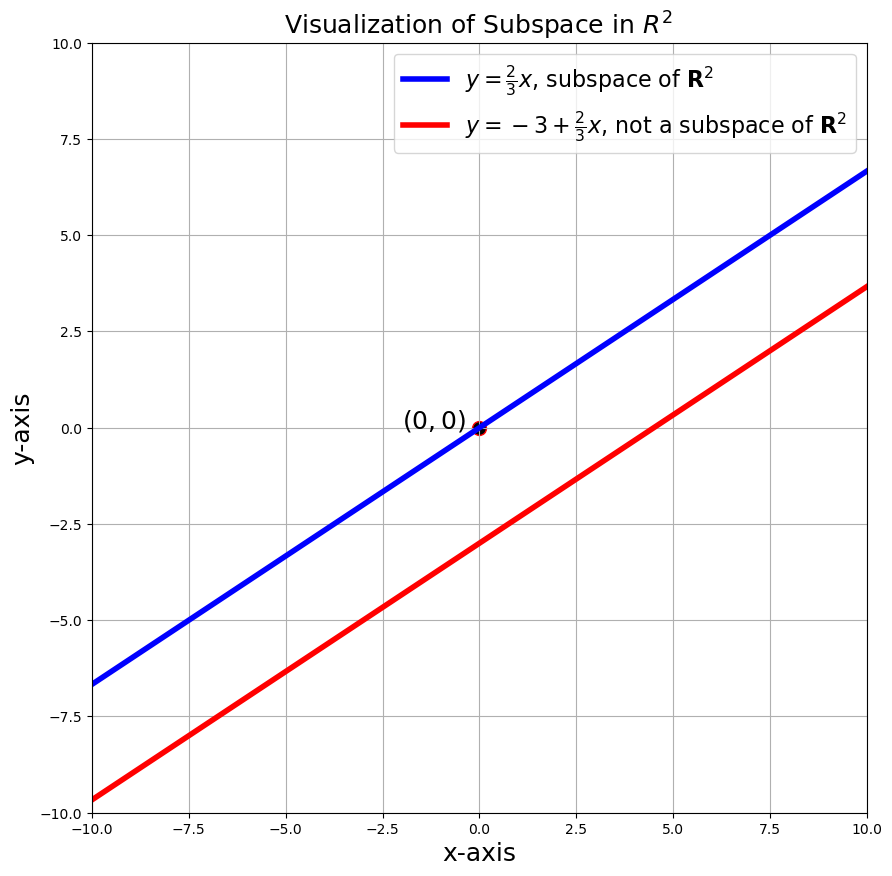

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))
####################### Arrows #######################
x = np.arange(-10, 11, 1)
y = 4/6*x
ax.plot(x, y, lw = 4, color = 'blue',label = r'$y = \frac{2}{3}x$, subspace of $\mathbf{R}^2$')

y = -3+4/6*x
ax.plot(x, y, lw = 4, color = 'red',label = r'$y = -3+\frac{2}{3}x$, not a subspace of $\mathbf{R}^2$')

ax.grid(True)
ax.set_title('Visualization of Subspace in $R^2$ ', size = 18)
ax.scatter(0, 0, s= 100, fc = 'black', ec = 'red')
ax.text(-2, 0, '$(0,0)$',size = 18)
ax.legend(fontsize = 16)

ax.axis([-10, 10, -10, 10])

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
plt.show()

## <font face="gotham" color="purple"> $\mathbb{R}^3$ 的子空间的可视化</font>

考虑两个向量 $u = (1,-2,1)^T$ 和 $v=(2,1,2)^T$ 的张成空间。$(u,v)$ 的张成空间是 $\mathbb{R}^3$ 的一个子空间，其中 $s$ 和 $t$ 是向量的标量。

$$
\left[
\begin{matrix}
x\\
y\\
z
\end{matrix}
\right]=
s\left[
\begin{matrix}
1\\
-2\\
1
\end{matrix}
\right]+
t\left[
\begin{matrix}
2\\
1\\
2
\end{matrix}
\right]=
\left[
\begin{matrix}
s+2t\\
-2s+t\\
s+2t
\end{matrix}
\right]
$$

我们还绘制了一个不是子空间的平面，通过在第三个方程上加上 $2$，即 $z= s+2t+2$。

请记住，matplotlib 没有 3D 引擎，我们必须将其旋转到合适的角度来显示布局。

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
C:\Users\cyy\AppData\Local\Temp\ipykernel_14148\1699641856.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title('Visualization of Subspace of $\mathbb{R}^3$', x = .5, y = 1.1, size = 20)


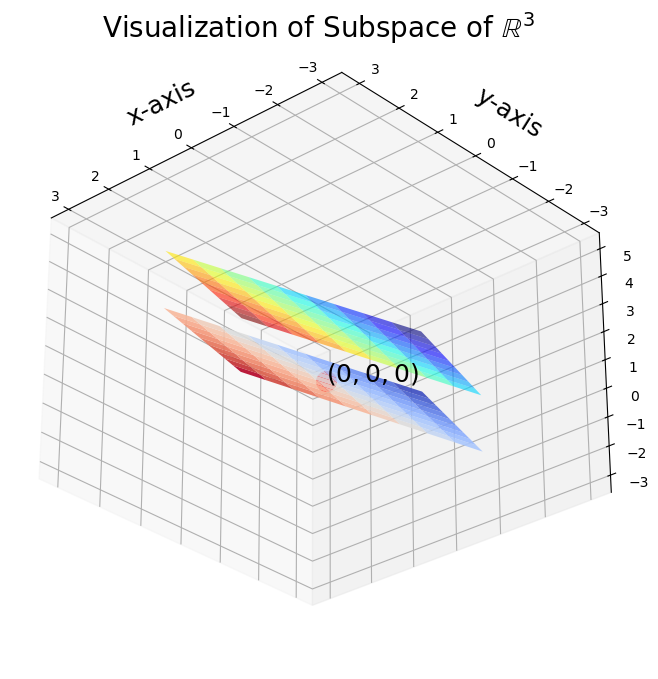

In [10]:
#%matplotlib notebook, use this only if you are in Jupyter Notebook
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S+2*T
Y = -2*S+T
Z = S+2*T

ax.plot_surface(X, Y, Z, alpha = .9,cmap=plt.cm.coolwarm)

Z2 = S+2*T+2 # this is not a subspace anymore
ax.plot_surface(X, Y, Z2, alpha = .6 ,cmap=plt.cm.jet)

ax.scatter(0,0,0, s = 200, color = 'red')
ax.text(0,0,0,'$(0,0,0)$',size = 18, zorder = 5)

ax.set_title('Visualization of Subspace of $\mathbb{R}^3$', x = .5, y = 1.1, size = 20)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=132)
plt.show()

正如您所看到的，包含 $(0,0,0)$ 的平面是一个子空间，但另一个平面不是。

# <font face="gotham" color="purple"> 张成</font>

我们之前已经多次提到了**张成**，现在我们给出一个正式的张成的定义。

用 $\text{span}(S)$ 表示子集 $\{v_1, v_2,...,v_n\}$ 的张成，它是向量空间 $V$ 中的一个线性组合。

$$
\text{span}(S)=\{c_1v_1+c_2v_2...+c_nv_n:c_1,...,c_n \in R\}
$$

在 $\mathbb{R}^3$ 中，两个向量的张成是一个平面，并且任意两个向量都张成一个平面。例如，我们有两个向量：$(3, 9, 2)$ 和 $(1,7,5)$，任意线性组合都是一个张成，即 $s(3,9,2)^T+t(1,7,5)^T$。

对于更一般的张成，矩阵乘法的一个基本事实可以帮助我们进行演示：

$$
AB = A[b_1\ b_2\  b_3,...,b_4]=[Ab_1\ Ab_2\ Ab_3,...,Ab_p]
$$

其中 $A$ 是张成向量的集合，$b_k$ 是线性组合的权重向量。我们可以生成一个随机矩阵 $B$ 来形成各种线性组合，以直观地验证它们是否都包含在张成的平面中。

我们定义
$$
A=\left[\begin{array}{rr}
3 & 1 \\
9 & 7 \\
2 & 5 
\end{array}\right]\qquad b_i\sim N(\mathbb{0}, 1)
$$

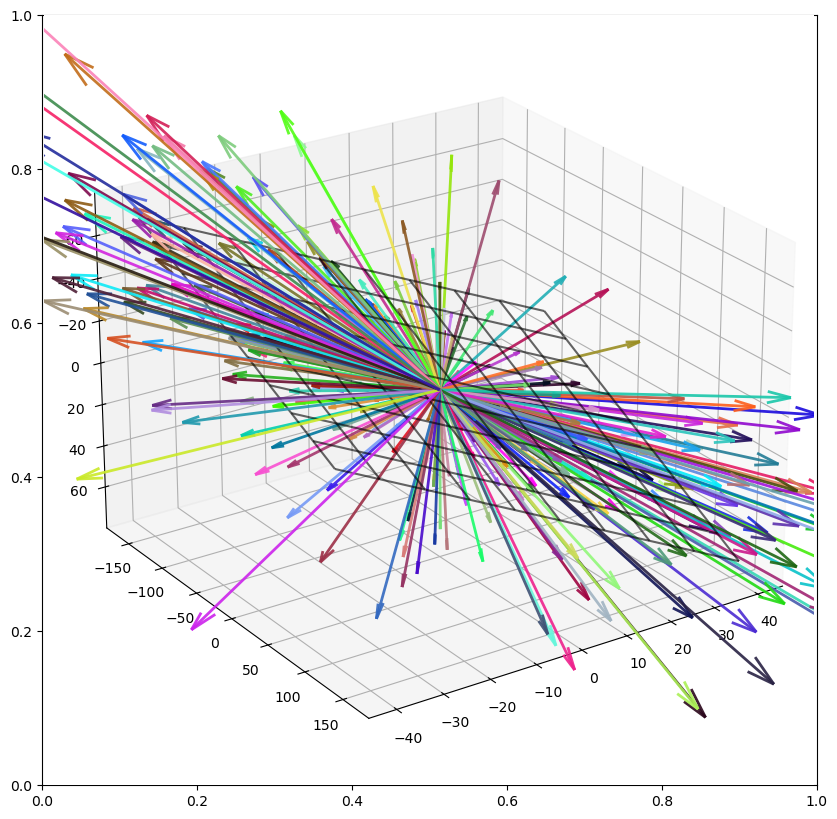

In [11]:
A = np.array([[3,9,2],[1,7,5]]).T

B = 10*np.random.randn(2, 300) # i = 300, i.e. 300 random weight vectors
vecs = A@B

s = np.linspace(-10, 10, 10)
t = np.linspace(-10, 10, 10)

S, T = np.meshgrid(s, t)

X = 3*S+T
Y = 9*S+7*T
Z = 2*S+5*T

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)
ax.scatter(0,0,0, s =200, ec = 'red', fc = 'black')

colors = np.random.rand(vecs.shape[1],3)
for i in range(vecs.shape[1]):
    vec = np.array([[0, 0, 0, vecs[0,i], vecs[1,i], vecs[2,i]]])
    X, Y, Z, U, V, W = zip(*vec)
    ax.quiver(X, Y, Z, U, V, W, length=1,color = colors[i], normalize=False, arrow_length_ratio = .07, pivot = 'tail',
          linestyles = 'solid',linewidths = 2, alpha = .9)
ax.view_init(elev=-156, azim=-56)
plt.show()

在图中移动视角，我们确认所有的向量都在 $\text{Span}(u,v)$ 中。

## <font face="gotham" color="purple"> $\mathbb{R}^3$ 的张成</font>

以下是使用三个向量 $(1,0,1)$，$(1,1,0)$ 和 $(0,1,1)$ 的张成的代码示例。我们将创建一个随机系数矩阵以形成不同的线性组合。

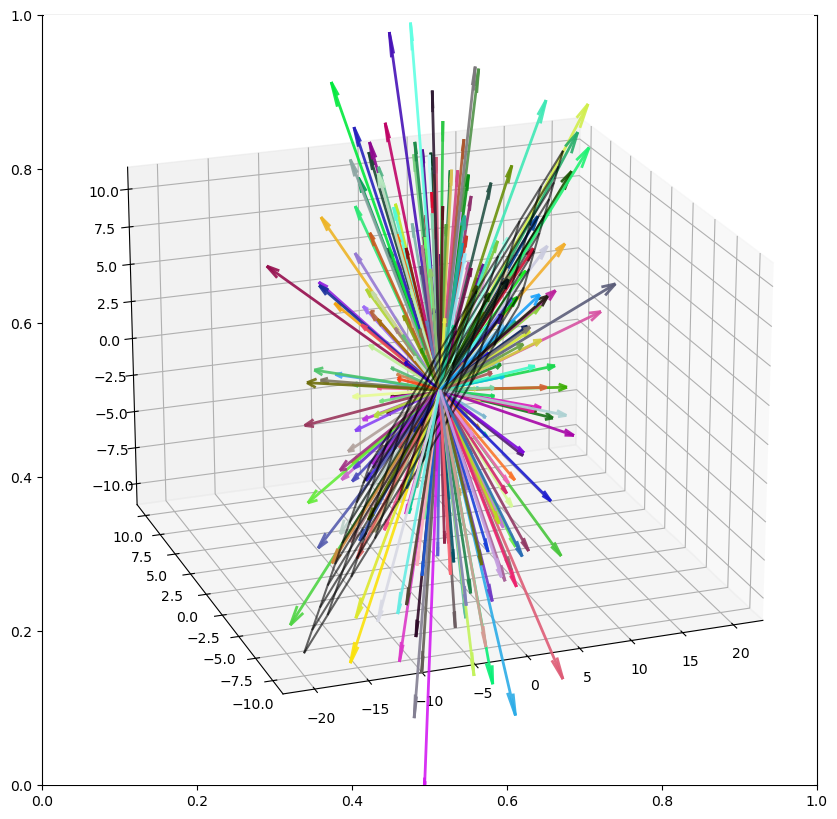

In [12]:
A = np.array([[1,0,1],[1,1,0],[0,1,1]]).T
B = 5*np.random.randn(3, 300)
vecs = A@B

s = np.linspace(-10, 10, 10)
t = np.linspace(-10, 10, 10)

S, T = np.meshgrid(s, t)

X = S+T
Y = T
Z = S

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)
ax.scatter(0,0,0, s =200, ec = 'red', fc = 'black')

colors = np.random.rand(vecs.shape[1],3)
for i in range(vecs.shape[1]):
    vec = np.array([[0, 0, 0, vecs[0,i], vecs[1,i], vecs[2,i]]])
    X, Y, Z, U, V, W = zip(*vec)
    ax.quiver(X, Y, Z, U, V, W, length=1,color = colors[i], normalize=False, arrow_length_ratio = .07, pivot = 'tail',
          linestyles = 'solid',linewidths = 2, alpha = .9)
ax.view_init(elev=21, azim=-110)
plt.show()

这些向量指向 $\mathbb{R}^3$ 中的所有可能方向，并且它们都保持在这三个向量的张成空间中。